## 경상북도, 196949
## 데이터 전처리
1. 필요없는 컬럼 빼기
2. region_sub 컬럼 원핫인코딩 형식 수정
3. 컬럼별 상관관계 파악 컬럼 제거
4. price_cat 컬럼 추가

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

region_name = 'gsb_region'

In [2]:
readD = pd.read_csv(f'region-data-files/{region_name}.csv')
readD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196949 entries, 0 to 196948
Columns: 105 entries, region to all_loan
dtypes: float64(72), int64(26), object(7)
memory usage: 157.8+ MB


In [3]:
all_col = {
    'region', 'region_sub', 'apt_name', 'apt_size', 'apt_floor', 'contract_date', 'contract_price',
    'completion_year', 'period_completed', 'pyung', 'price_per_pyung', 'contract_year', 'value_year',
    'value_factor', 'price_per_pyung_present', 'contract_date_key', 'index',  'date_ym', 'kospi',
    'kospi200', 'kospi200construct', 'kosdaq', 'dowjones', 's&p500', 'shanghai', 'nikkei',
    'exchange_rate', 'gold', 'oil', 'export', 'import', 'cpi_living', 'cpi', 'ccsi',
    'loan_interest_rate', 'housing_loan_rate',
    
    'gw_ratio', 'gg_ratio', 'gsn_ratio', 'gsb_ratio', 'gj_ratio', 'dg_ratio', 'dj_ratio',
    'bs_ratio', 'so_ratio', 'sj_ratio', 'us_ratio', 'ic_ratio', 'jrn_ratio', 'jrb_ratio',
    'jj_ratio', 'ccn_ratio', 'ccb_ratio', 'all_ratio',
    
    'gw_pop', 'gg_pop', 'gsn_pop', 'gsb_pop', 'gj_pop', 'dg_pop', 'dj_pop', 'bs_pop',
    'so_pop', 'sj_pop', 'us_pop', 'ic_pop', 'jrn_pop', 'jrb_pop', 'jj_pop', 'ccn_pop', 'ccb_pop',
    
    'all_re_ccsi', 'so_re_ccsi', 'ic_re_ccsi', 'gg_re_ccsi', 'bs_re_ccsi', 'dg_re_ccsi',
    'gj_re_ccsi', 'dj_re_ccsi', 'us_re_ccsi', 'gw_re_ccsi', 'ccb_re_ccsi', 'ccn_re_ccsi',
    'jrb_re_ccsi', 'jrn_re_ccsi', 'gsb_re_ccsi', 'gsn_re_ccsi',
    
    'gw_loan', 'gg_loan', 'gsn_loan', 'gsb_loan', 'gj_loan', 'dg_loan', 'dj_loan',
    'bs_loan', 'so_loan', 'sj_loan', 'us_loan', 'ic_loan', 'jrn_loan', 'jrb_loan',
    'jj_loan', 'ccn_loan', 'ccb_loan', 'all_loan'
}

In [4]:
drop_col_1 = {
    'region', 'apt_name', 'apt_size', 'contract_date', 'contract_price',
    'completion_year', 'price_per_pyung', 'contract_year', 'value_year',
    'value_factor', 'contract_date_key', 'index', 'date_ym', 'kospi',
    's&p500', 'nikkei', 'cpi', 'ccsi', 'housing_loan_rate',
    
    'gw_ratio', 'gg_ratio', 'gsn_ratio', 'gsb_ratio', 'gj_ratio', 'dg_ratio', 'dj_ratio',
    'bs_ratio', 'so_ratio', 'sj_ratio', 'us_ratio', 'ic_ratio', 'jrn_ratio', 'jrb_ratio',
    'jj_ratio', 'ccn_ratio', 'ccb_ratio', 'all_ratio',
    
    'gg_pop', 'gj_pop', 'dj_pop', 'bs_pop',
    'so_pop', 'sj_pop', 'us_pop', 'ic_pop', 'jrn_pop', 'jrb_pop', 'jj_pop', 'ccn_pop',
    
    'all_re_ccsi', 'so_re_ccsi', 'ic_re_ccsi', 'gg_re_ccsi', 'bs_re_ccsi', 'dg_re_ccsi',
    'gj_re_ccsi', 'dj_re_ccsi', 'us_re_ccsi', 'gw_re_ccsi', 'ccb_re_ccsi', 'ccn_re_ccsi',
    'jrb_re_ccsi', 'jrn_re_ccsi', 'gsn_re_ccsi',
    
    'gw_loan', 'gg_loan', 'gsn_loan', 'gj_loan', 'dg_loan', 'dj_loan',
    'bs_loan', 'so_loan', 'sj_loan', 'us_loan', 'ic_loan', 'jrn_loan', 'jrb_loan',
    'jj_loan', 'ccn_loan', 'ccb_loan', 'all_loan'
}

In [5]:
preD = readD.drop(columns=drop_col_1)
preD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196949 entries, 0 to 196948
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region_sub               196949 non-null  object 
 1   apt_floor                196949 non-null  int64  
 2   period_completed         196949 non-null  int64  
 3   pyung                    196949 non-null  float64
 4   price_per_pyung_present  196949 non-null  float64
 5   kospi200                 196949 non-null  float64
 6   kospi200construct        196949 non-null  float64
 7   kosdaq                   196949 non-null  float64
 8   dowjones                 196949 non-null  float64
 9   shanghai                 196949 non-null  float64
 10  exchange_rate            196949 non-null  float64
 11  gold                     196949 non-null  float64
 12  oil                      196949 non-null  float64
 13  export                   196949 non-null  int64  
 14  impo

In [6]:
# test = preD['region_sub'].str.split(expand=True)[0]
# test.value_counts()

preD['region_sub'] = preD['region_sub'].str.split(expand=True)[0]
preD['region_sub'].value_counts()

구미시     44509
포항북구    30727
경산시     26076
포항남구    19519
경주시     16174
안동시     11629
칠곡군     10078
김천시      9011
영천시      6649
영주시      6356
상주시      4685
문경시      2802
울진군      1538
예천군      1489
고령군      1238
의성군       888
청도군       863
영덕군       837
성주군       817
봉화군       442
청송군       284
군위군       217
영양군        94
울릉군        27
Name: region_sub, dtype: int64

In [7]:
drop_col_2 = {
    'dg_pop'
}

preD.drop(columns=drop_col_2, inplace=True)
preD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196949 entries, 0 to 196948
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region_sub               196949 non-null  object 
 1   apt_floor                196949 non-null  int64  
 2   period_completed         196949 non-null  int64  
 3   pyung                    196949 non-null  float64
 4   price_per_pyung_present  196949 non-null  float64
 5   kospi200                 196949 non-null  float64
 6   kospi200construct        196949 non-null  float64
 7   kosdaq                   196949 non-null  float64
 8   dowjones                 196949 non-null  float64
 9   shanghai                 196949 non-null  float64
 10  exchange_rate            196949 non-null  float64
 11  gold                     196949 non-null  float64
 12  oil                      196949 non-null  float64
 13  export                   196949 non-null  int64  
 14  impo

In [8]:
corr_matrix = preD.corr()
corr_matrix["price_per_pyung_present"].sort_values(ascending=False)

price_per_pyung_present    1.000000
pyung                      0.349746
apt_floor                  0.321467
shanghai                   0.085794
ccb_pop                    0.084665
gsb_loan                   0.079623
gsn_pop                    0.074754
dowjones                   0.073510
exchange_rate              0.059574
cpi_living                 0.058312
kosdaq                     0.054500
gw_pop                     0.049471
kospi200                   0.007868
gold                      -0.028030
gsb_re_ccsi               -0.028987
export                    -0.052968
gsb_pop                   -0.057048
import                    -0.064120
oil                       -0.093500
kospi200construct         -0.108417
loan_interest_rate        -0.124209
period_completed          -0.656106
Name: price_per_pyung_present, dtype: float64

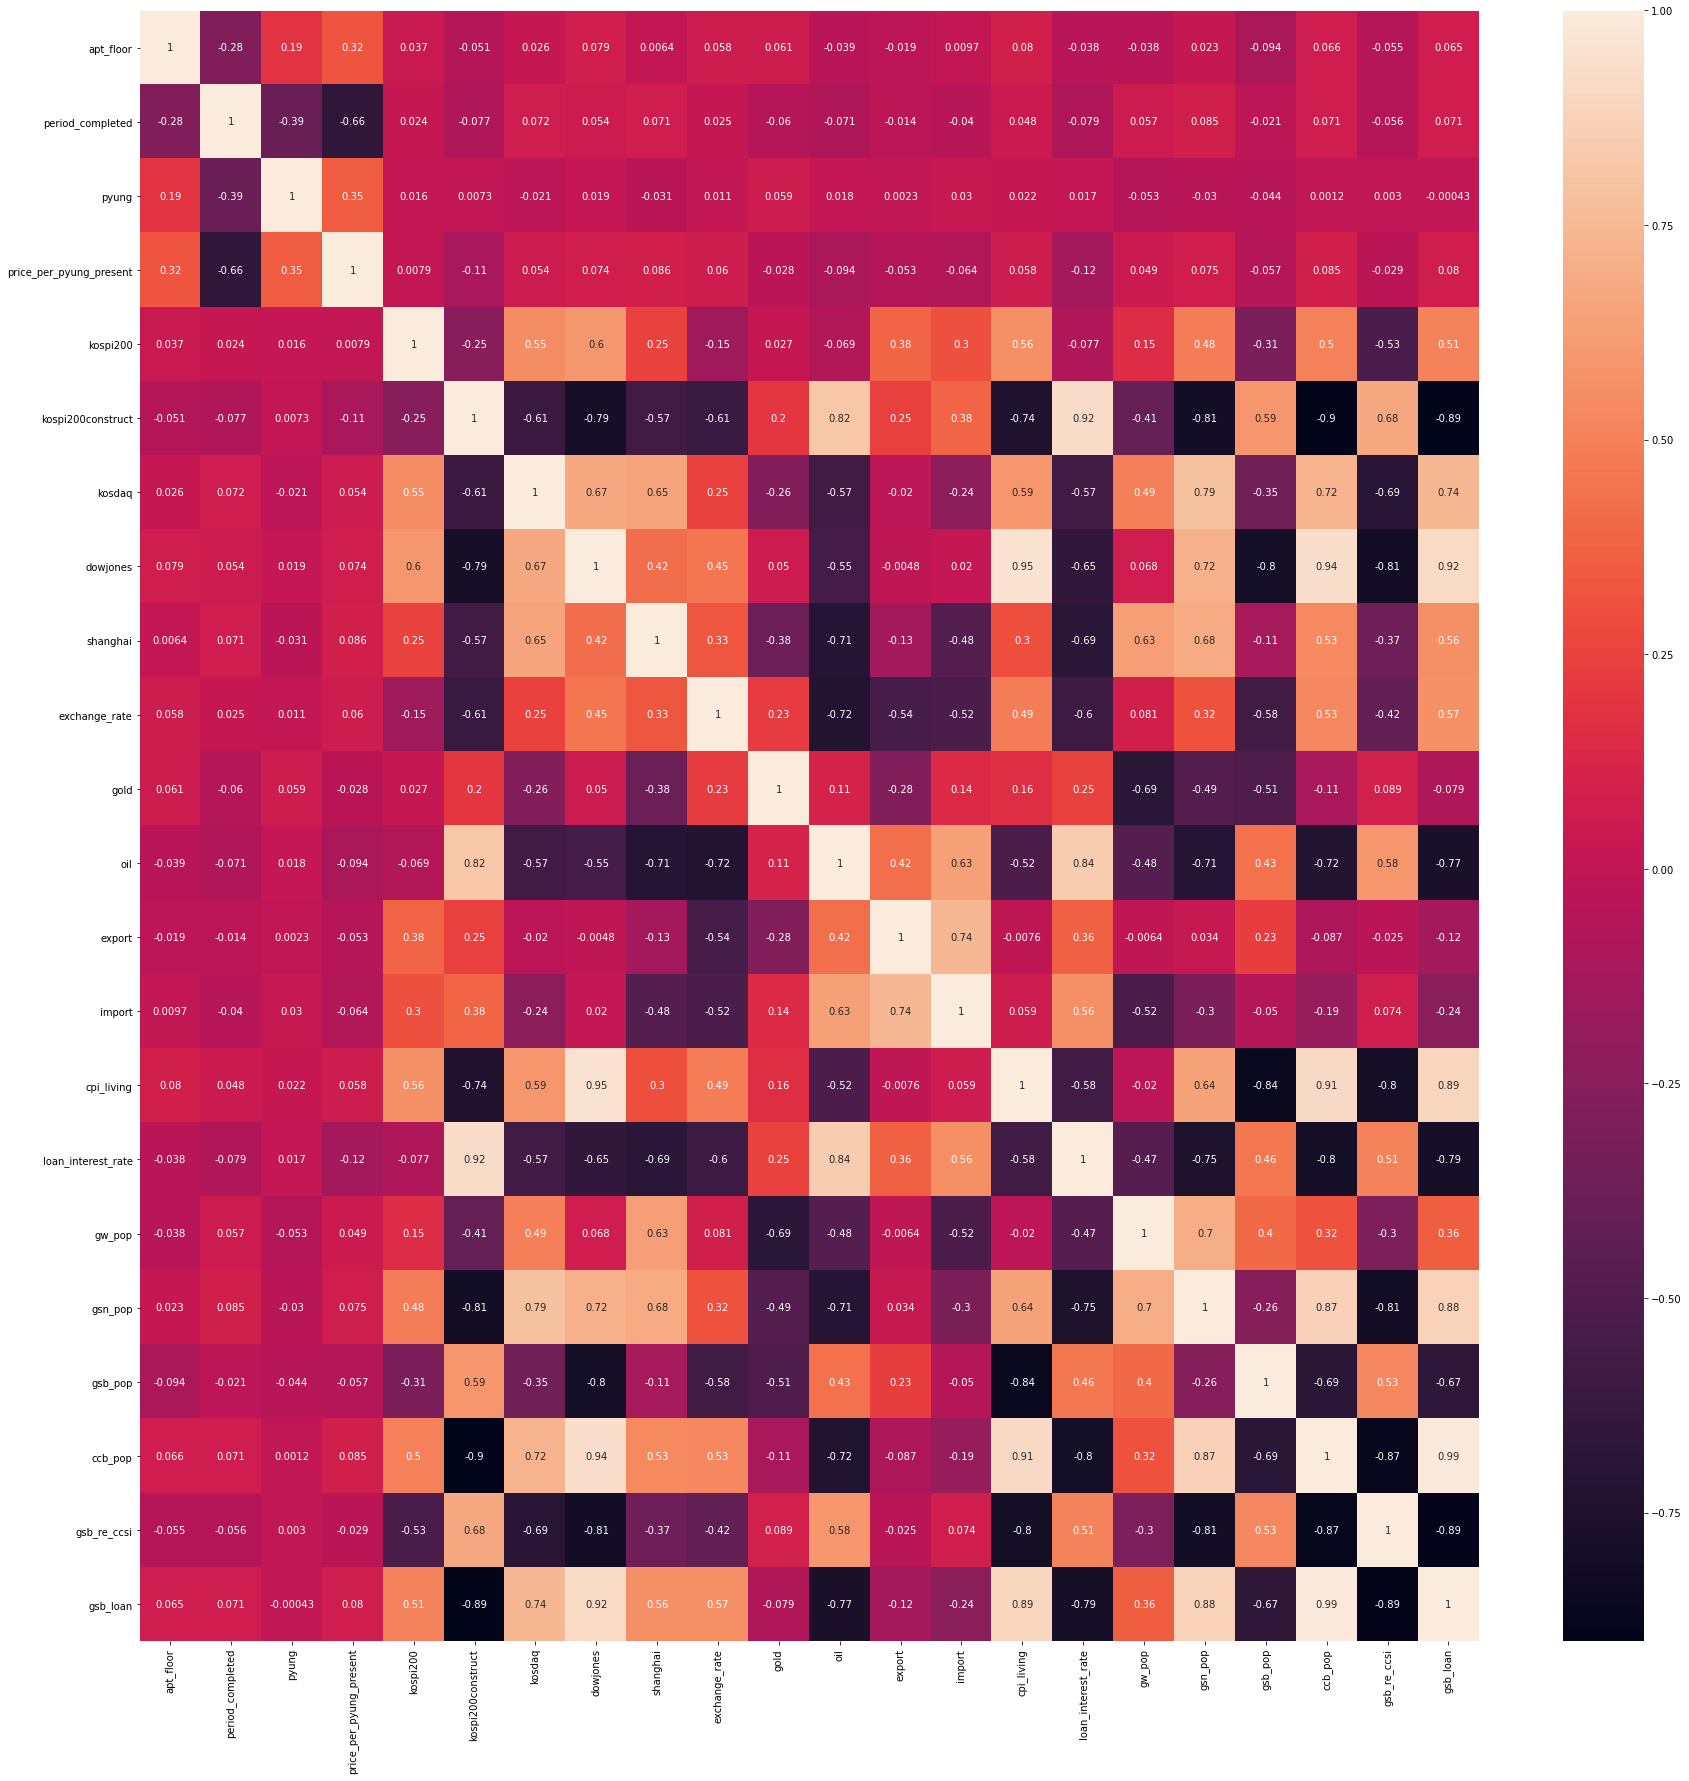

In [9]:
import seaborn as sns

plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True)
plt.show()


count    1.969490e+05
mean     6.333766e+06
std      2.625428e+06
min      4.693210e+05
25%      4.290780e+06
50%      6.086341e+06
75%      8.186651e+06
max      2.181418e+07
Name: price_per_pyung_present, dtype: float64


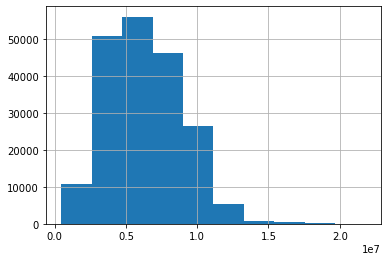

In [10]:
print(preD['price_per_pyung_present'].describe())

preD['price_per_pyung_present'].hist()
plt.show()

In [11]:
preD['price_cat'] = preD['price_per_pyung_present'] / 4.693210e+05  # min
print(preD['price_cat'].describe())

count    196949.000000
mean         13.495594
std           5.594099
min           1.000000
25%           9.142527
50%          12.968397
75%          17.443607
max          46.480290
Name: price_cat, dtype: float64


In [12]:
def calc_price_categorize(D):

    if D['price_cat'] < 9.142527 : # 25%
        D['price_cat'] = 1.0
    elif D['price_cat'] < 12.968397 : # 50%
        D['price_cat'] = 2.0
    elif D['price_cat'] < 17.443607 : # 75%
        D['price_cat'] = 3.0
    else:
        D['price_cat'] = 4.0

    return D
    
preD = preD.apply(calc_price_categorize, axis=1)
preD['price_cat'].value_counts()

3.0    49240
2.0    49238
1.0    49237
4.0    49234
Name: price_cat, dtype: int64

In [13]:
preD.to_csv(f'region-ml-data-files/{region_name}.csv', index=False, encoding='utf-8-sig')

## 기계 학습
1. price_cat 분포별 데이터 나누기
2. train_set, test_set 나누기
3. 스케일 조정
4. 모델별 학습, 테스트
5. 모델 최적화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

region_name = 'gsb_region'

In [2]:
readD = pd.read_csv(f'region-ml-data-files/{region_name}.csv')
readD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196949 entries, 0 to 196948
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region_sub               196949 non-null  object 
 1   apt_floor                196949 non-null  int64  
 2   period_completed         196949 non-null  int64  
 3   pyung                    196949 non-null  float64
 4   price_per_pyung_present  196949 non-null  float64
 5   kospi200                 196949 non-null  float64
 6   kospi200construct        196949 non-null  float64
 7   kosdaq                   196949 non-null  float64
 8   dowjones                 196949 non-null  float64
 9   shanghai                 196949 non-null  float64
 10  exchange_rate            196949 non-null  float64
 11  gold                     196949 non-null  float64
 12  oil                      196949 non-null  float64
 13  export                   196949 non-null  int64  
 14  impo

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_idx, test_idx in split.split(readD, readD["price_cat"]): # readD['price_cat'] 분포 유지
    train_set = readD.loc[train_idx]
    test_set = readD.loc[test_idx]

In [4]:
train_set['price_cat'].value_counts() / len(train_set)

3.0    0.250015
2.0    0.250000
1.0    0.250000
4.0    0.249985
Name: price_cat, dtype: float64

In [5]:
for set_ in (train_set, test_set):
    set_.drop('price_cat', axis=1, inplace=True)

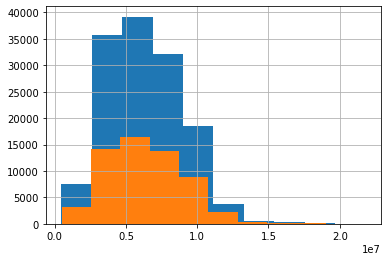

In [6]:
train_set['price_per_pyung_present'].hist()
test_set['price_per_pyung_present'].hist()
plt.show()

In [7]:
x_train = train_set.drop('price_per_pyung_present', axis=1)
y_train = train_set['price_per_pyung_present'].copy()
x_test =  test_set.drop('price_per_pyung_present', axis=1)
y_test = test_set['price_per_pyung_present'].copy()

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        return x[self.attribute_names].values

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor

num_pipe = Pipeline([
        ('selector', DataFrameSelector(list(x_train)[1:])),
        ('std_scaler', StandardScaler())
    ])

cat_pipe = Pipeline([
        ('selector', DataFrameSelector(['region_sub'])),
        ('cat_encoder', OneHotEncoder(sparse=False))
    ])

prepro_pipe = FeatureUnion([
        ("num_pipe", num_pipe),
        ("cat_pipe", cat_pipe)
    ])

full_pipe = Pipeline([
        ('prepro', prepro_pipe),
        ("gbr", GradientBoostingRegressor())
    ])

x_train_nor = prepro_pipe.fit_transform(x_train)
# x_test_nor = prepro_pipe.fit_transform(x_test)


In [10]:
x_train_nor[1, :]


array([ 0.52566376,  0.8561163 , -0.90125169,  1.1371627 , -0.99773756,
        0.37436488,  1.93126479,  0.43681707,  0.58608463,  0.91073821,
       -0.19926819,  0.05041942,  0.79744476,  1.51769886, -1.10543749,
       -0.70564665,  0.41948671, -1.63475828,  1.26188687, -0.66411218,
        1.15770258,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {'gbr__n_estimators': [900, 1000],
              'gbr__max_depth': [8, 9]}

grid = GridSearchCV(full_pipe, param_grid=param_grid, cv=3)
grid.fit(x_train, y_train)

print("최상의 교차 검증 정확도: ", grid.best_score_)
print("테스트 세트 점수: ", grid.score(x_test, y_test))
print("최적의 매개변수: {}".format(grid.best_params_))

최상의 교차 검증 정확도:  0.8960745775155924
테스트 세트 점수:  0.9061102598401134
최적의 매개변수: {'gbr__max_depth': 9, 'gbr__n_estimators': 1000}


In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

test_pred = grid.predict(x_test)
grid_mse = mean_squared_error(y_test, test_pred)
grid_rmse = np.sqrt(grid_mse)
print('grid rmse: ', grid_rmse)

grid_mae = mean_absolute_error(y_test, test_pred)
print('grid mae: ', grid_mae)

grid rmse:  808062.0547911641
grid mae:  544806.6339631196


In [13]:
grid.cv_results_

{'mean_fit_time': array([619.96770215, 701.15580146, 706.90126642, 770.37128973]),
 'std_fit_time': array([ 4.73729019, 11.18479987, 14.02285598, 11.20075155]),
 'mean_score_time': array([1.47443787, 1.600751  , 1.72475108, 1.88431414]),
 'std_score_time': array([0.03354294, 0.12327221, 0.05258384, 0.07555283]),
 'param_gbr__max_depth': masked_array(data=[8, 8, 9, 9],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gbr__n_estimators': masked_array(data=[900, 1000, 900, 1000],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'gbr__max_depth': 8, 'gbr__n_estimators': 900},
  {'gbr__max_depth': 8, 'gbr__n_estimators': 1000},
  {'gbr__max_depth': 9, 'gbr__n_estimators': 900},
  {'gbr__max_depth': 9, 'gbr__n_estimators': 1000}],
 'split0_test_score': array([0.89235665, 0.89303248, 0.8960963 , 0.89646038]),
 'split1_test_score': array([0.8939452 , 0.89500336, 0.897330

In [14]:
final_model = grid.best_estimator_
final_model

Pipeline(steps=[('prepro',
                 FeatureUnion(transformer_list=[('num_pipe',
                                                 Pipeline(steps=[('selector',
                                                                  DataFrameSelector(attribute_names=['apt_floor',
                                                                                                     'period_completed',
                                                                                                     'pyung',
                                                                                                     'kospi200',
                                                                                                     'kospi200construct',
                                                                                                     'kosdaq',
                                                                                                     'dowjones',
                              

In [15]:
import joblib

joblib.dump(final_model, f'models/{region_name}.pkl')


['models/gsb_region.pkl']

In [16]:
# test model
import joblib

gw_model = joblib.load(f'models/{region_name}.pkl')

test_pred = gw_model.predict(x_test)
grid_mse = mean_squared_error(y_test, test_pred)
grid_rmse = np.sqrt(grid_mse)
print('grid rmse: ', grid_rmse)

grid rmse:  808062.0547911641
